In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_regression
from patsy import dmatrix
from sklearn.linear_model import LinearRegression
import statsmodels.stats.api as sms
import numpy as np

/Users/jakekong/.pyenv/versions/3.6.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver import ActionChains
import time



lotto_numbers = []

chromedriver = '/Users/jakekong/documents/chromedriver/chromedriver_mac64/chromedriver'
driver = webdriver.Chrome(chromedriver)
driver.get('http://lottor.kr/analysis/info_02.php')
time.sleep(3)

total = driver.find_elements_by_css_selector('#rightWrap > table > tbody > tr:nth-child(3) > td > table.bbs_t > tbody > tr:nth-child(1) > td:nth-child(1)')
oritinal_total = int(total[0].text)
total = int(total[0].text) - int(total[0].text) % 10 + 20
print (total)
driver.quit()



for i in range( total // 20):
    back_number = i * 20
    chromedriver = '/Users/jakekong/documents/chromedriver/chromedriver_mac64/chromedriver'
    driver = webdriver.Chrome(chromedriver)
    driver.get('http://lottor.kr/analysis/info_02.php?sStart={}'.format(back_number))
    
    tr = driver.find_elements_by_css_selector('#rightWrap > table > tbody > tr:nth-child(3) > td > table.bbs_t > tbody > tr')
    
    for i in range(1, len(tr)+1):
        first_nums = driver.find_elements_by_css_selector('#rightWrap > table > tbody > tr:nth-child(3) > td > table.bbs_t > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i))
        second_nums = driver.find_elements_by_css_selector('#rightWrap > table > tbody > tr:nth-child(3) > td > table.bbs_t > tbody > tr:nth-child({}) > td:nth-child(3)'.format(i))
        third_nums = driver.find_elements_by_css_selector('#rightWrap > table > tbody > tr:nth-child(3) > td > table.bbs_t > tbody > tr:nth-child({}) > td:nth-child(4)'.format(i))
        fourth_nums = driver.find_elements_by_css_selector('#rightWrap > table > tbody > tr:nth-child(3) > td > table.bbs_t > tbody > tr:nth-child({}) > td:nth-child(5)'.format(i))
        fifth_nums = driver.find_elements_by_css_selector('#rightWrap > table > tbody > tr:nth-child(3) > td > table.bbs_t > tbody > tr:nth-child({}) > td:nth-child(6)'.format(i))
        sixth_nums = driver.find_elements_by_css_selector('#rightWrap > table > tbody > tr:nth-child(3) > td > table.bbs_t > tbody > tr:nth-child({}) > td:nth-child(7)'.format(i))
 
    # date_withtime[0].text # 하나의 리스트 클래스로 생성됨 예: [3]
        lotto_numbers.append([int(first_nums[0].text), int(second_nums[0].text), int(third_nums[0].text), int(fourth_nums[0].text), int(fifth_nums[0].text), int(sixth_nums[0].text)])

    
    driver.quit()
    

800


In [6]:
import pandas as pd

head = ["1st", "2nd", "3rd", "4th", "5th", "6th"]

df_lotto = pd.DataFrame(lotto_numbers, columns = head)

In [7]:
print (df_lotto["1st"].sum()/ oritinal_total, df_lotto["2nd"].sum()/ oritinal_total, df_lotto["3rd"].sum()/ oritinal_total, df_lotto["4th"].sum()/ oritinal_total, df_lotto["5th"].sum()/ oritinal_total, df_lotto["6th"].sum()/ oritinal_total)

6.5716112532 12.9475703325 19.820971867 26.1253196931 32.7723785166 39.4117647059


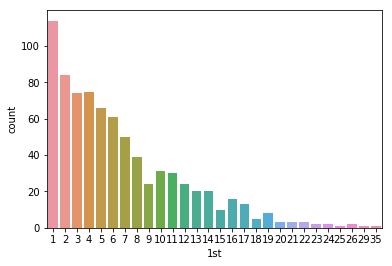

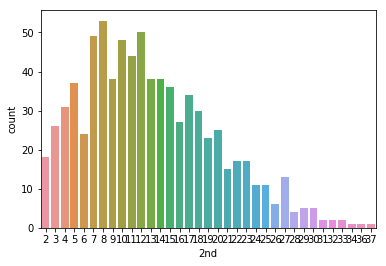

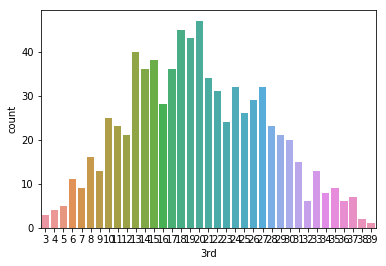

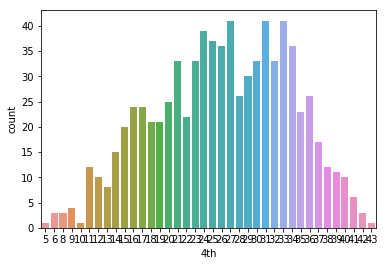

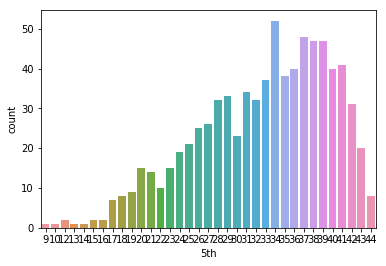

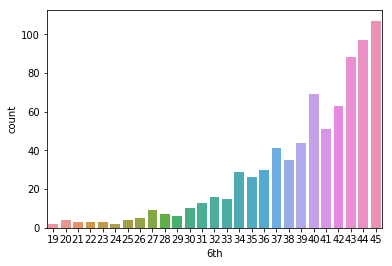

In [10]:
sns.countplot(df_lotto['1st'])
plt.show()
sns.countplot(df_lotto['2nd'])
plt.show()
sns.countplot(df_lotto['3rd'])
plt.show()
sns.countplot(df_lotto['4th'])
plt.show()
sns.countplot(df_lotto['5th'])
plt.show()
sns.countplot(df_lotto['6th'])
plt.show()

In [11]:
df_lotto.to_csv('lotto.csv')